In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact

# autoreload
%load_ext autoreload
%autoreload 2

#This filters out future warnings
import warnings  
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import roc_auc_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [93]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [94]:
# Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
cardio['Sex'] = cardio['Sex'].replace({'Female': 0, 'Male': 1})

# Create new binary columns for 'Male' and 'Female'
cardio['Male'] = (cardio['Sex'] == 1).astype(int)
cardio['Female'] = (cardio['Sex'] == 0).astype(int)

# Drop the original 'Sex' column
cardio.drop(columns=['Sex'], inplace=True)

# Verify the counts in 'Male' and 'Female' columns
print(cardio['Male'].value_counts())
print(cardio['Female'].value_counts())


0    160196
1    148658
Name: Male, dtype: int64
1    160196
0    148658
Name: Female, dtype: int64


In [95]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Male,Female
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0,1
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,0,1
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,0,1
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,1,0
4,Good,Within the past year,No,No,No,No,No,No,No,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,1,0


In [96]:
# Map binary categorical variables to 0 and 1
binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
cardio[binary_cols] = cardio[binary_cols].replace({'No': 0, 'Yes': 1})

# Confirm the encoding
print(cardio[binary_cols].head())

   Heart_Disease  Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0              0         0            0             0           0          1   
1              1         0            0             0           0          0   
2              0         1            0             0           0          0   
3              1         1            0             0           0          0   
4              0         0            0             0           0          0   

   Smoking_History  
0                1  
1                0  
2                0  
3                0  
4                1  


In [97]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Male,Female
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0,1
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,0,1
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0,1
3,Poor,Within the past year,1,1,0,0,0,Yes,0,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1,0
4,Good,Within the past year,0,0,0,0,0,No,0,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,1,0


In [98]:
# Apply one-hot encoding to 'General_Health', 'Checkup', and 'Diabetes' columns
cardio = pd.get_dummies(cardio, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)

# Verify the DataFrame after preprocessing
print(cardio.head())

   Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0         0              0            0             0           0          1   
1         0              1            0             0           0          0   
2         1              0            0             0           0          0   
3         1              1            0             0           0          0   
4         0              0            0             0           0          0   

  Age_Category  Height_(cm)  Weight_(kg)    BMI  ...  General_Health_Good  \
0        70-74        150.0        32.66  14.54  ...                    0   
1        70-74        165.0        77.11  28.29  ...                    0   
2        60-64        163.0        88.45  33.47  ...                    0   
3        75-79        180.0        93.44  28.73  ...                    0   
4          80+        191.0        88.45  24.37  ...                    1   

   General_Health_Poor  General_Health_Very Good  Checku

In [99]:
Average_Age = []
for number in cardio['Age_Category']:
    if '-' in number:
        new = number.split('-')
        Average_Age.append((int(new[0]) + int(new[1])) / 2)
    else: 
        Average_Age.append(85)

cardio['Average_Age'] = Average_Age

cardio = cardio.drop(columns = 'Age_Category')

'''
Due to the last age group being 80+ with no upper limit I guessed and 
put the highest age at 85. This my impact things at the highest age range
'''

'\nDue to the last age group being 80+ with no upper limit I guessed and \nput the highest age at 85. This my impact things at the highest age range\n'

In [100]:
# Drop the original 'Female' column
cardio.drop(columns=['Female'], inplace=True)

# Verify the counts in 'Male' column
print(cardio['Male'].value_counts())

0    160196
1    148658
Name: Male, dtype: int64


In [101]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,150.0,32.66,14.54,1,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,165.0,77.11,28.29,0,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,163.0,88.45,33.47,0,...,0,1,0,0,0,1,0,1,0,62.0
3,1,1,0,0,0,0,180.0,93.44,28.73,0,...,1,0,0,0,0,1,0,1,0,77.0
4,0,0,0,0,0,0,191.0,88.45,24.37,1,...,0,0,0,0,0,1,0,0,0,85.0


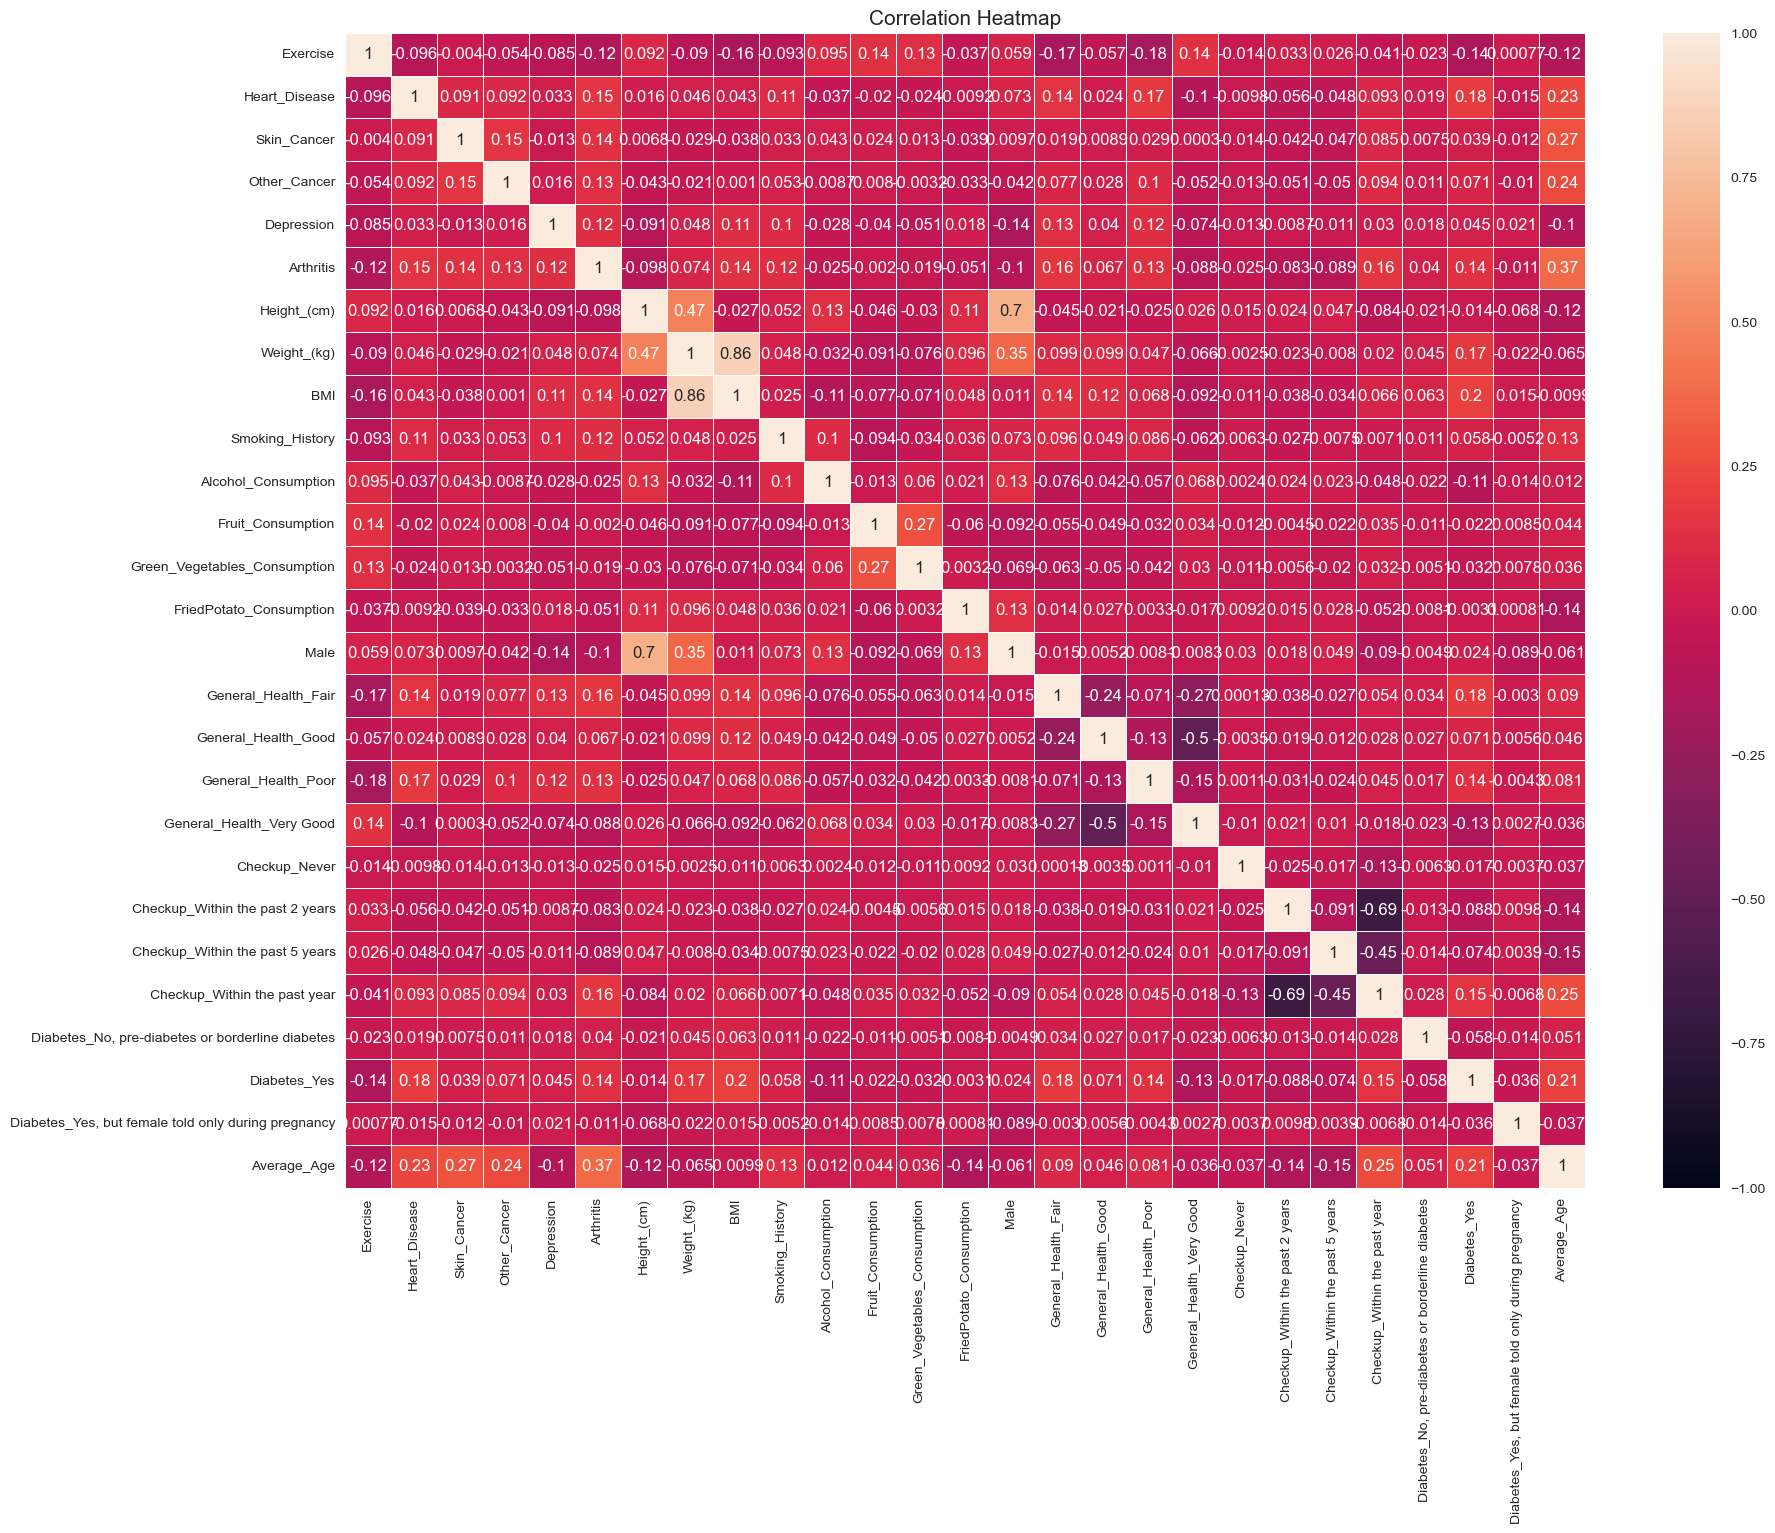

In [102]:
plt.figure(figsize = (20, 15))
sns.heatmap((cardio).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking_History'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>,
        <Axes: title={'center': 'Male'}>],
       [<Axes: title={'center': 'General_Health_Fair'}>,
        <Axes: title={'center': 'General_Health_Good'}>,
        <Axes: title={'center': 'General_Health_Poor'}>,
        <Axes: title={'center': 'General_Health_Very Good'}>,


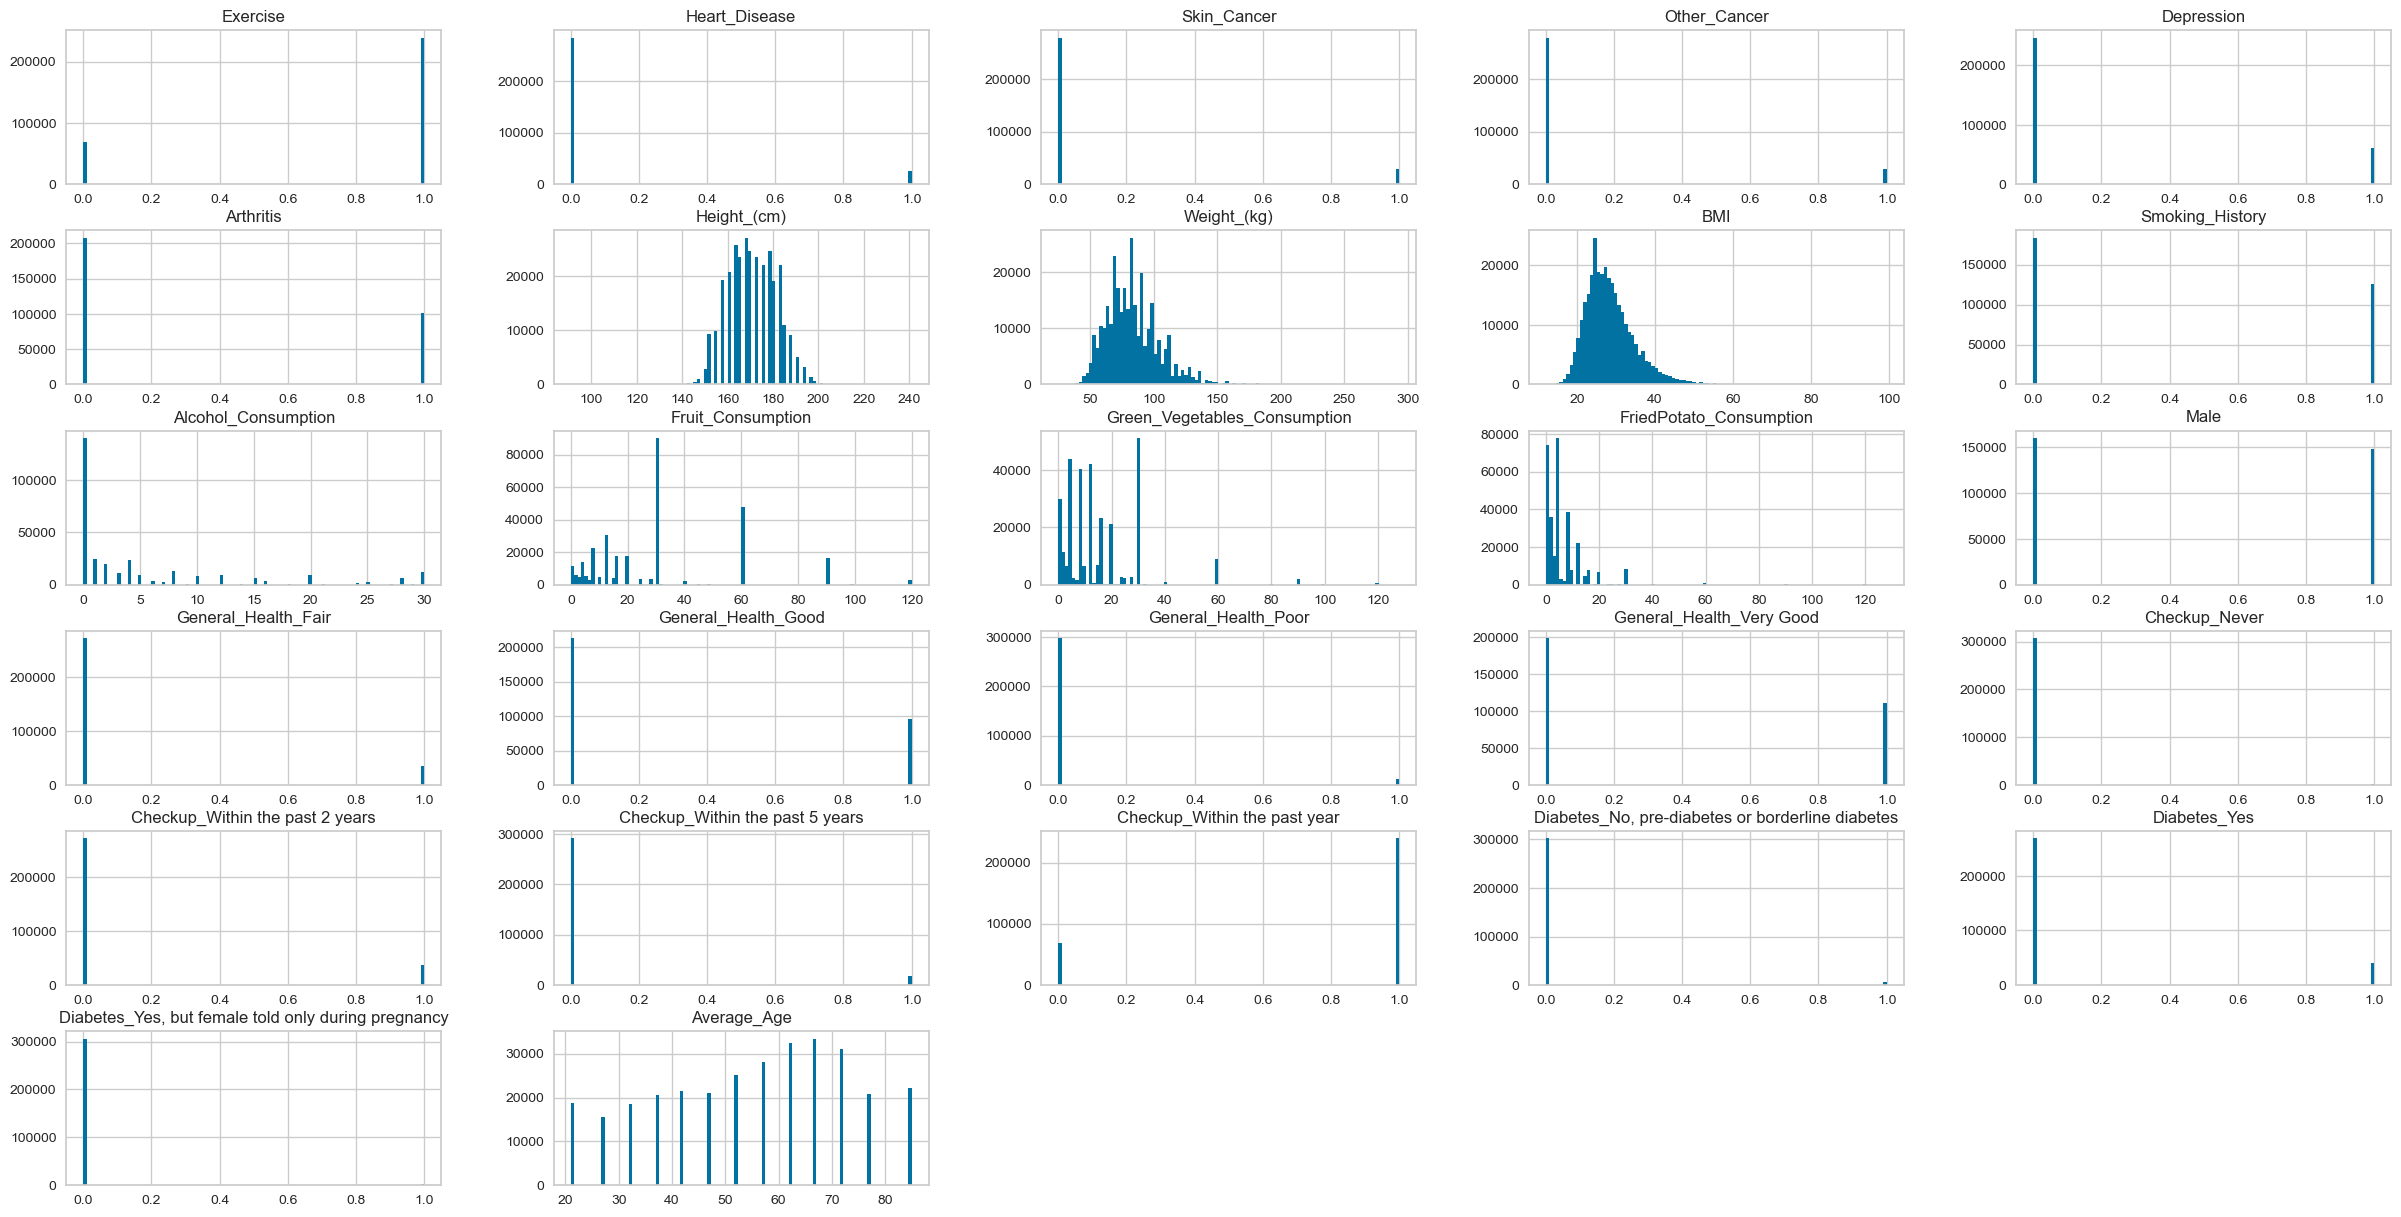

In [103]:
cardio.hist(bins=100, figsize = [30, 15])

Average_Age: 0.9954
General_Health_Fair: 0.5566
General_Health_Good: 0.4840
Male: 0.4519
General_Health_Poor: 0.4306
General_Health_Very Good: 0.2314
Smoking_History: 0.2122
Checkup_Within the past year: 0.2074
Diabetes_Yes: 0.2028
Arthritis: 0.1443
Depression: 0.1234
BMI: 0.1192
Weight_(kg): -0.1150
Alcohol_Consumption: -0.0691
Checkup_Within the past 2 years: 0.0512
Other_Cancer: 0.0334
Diabetes_No, pre-diabetes or borderline diabetes: 0.0270
Skin_Cancer: 0.0270
Green_Vegetables_Consumption: 0.0253
Exercise: -0.0207
Checkup_Within the past 5 years: 0.0125
Diabetes_Yes, but female told only during pregnancy: 0.0080
FriedPotato_Consumption: -0.0074
Checkup_Never: 0.0059
Height_(cm): 0.0017
Fruit_Consumption: -0.0002


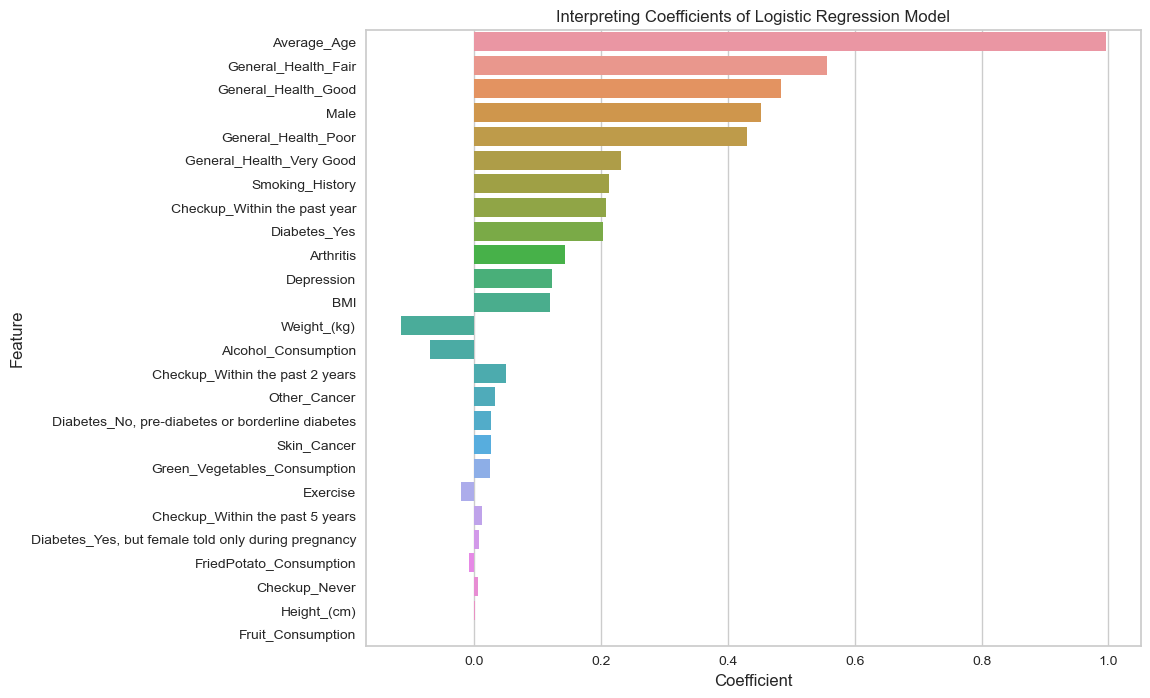

In [104]:
# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model and trained on the training data added class weight
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

#==================================================================================================
# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
# Adjust the threshold for prediction
threshold = 0.5  # You can experiment with different threshold values
y_pred = (logreg.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)
roc_auc_test = roc_auc_score(y_test, y_pred)
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients and their interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight the most important features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Print the interpretation of the coefficients
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Optionally, you can plot the coefficients to visualize their magnitudes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Interpreting Coefficients of Logistic Regression Model')
plt.show()

Average_Age: 0.9954
General_Health_Fair: 0.5566
General_Health_Good: 0.4840
Male: 0.4519
General_Health_Poor: 0.4306
General_Health_Very Good: 0.2314
Smoking_History: 0.2122
Checkup_Within the past year: 0.2074
Diabetes_Yes: 0.2028
Arthritis: 0.1443
Depression: 0.1234
BMI: 0.1192
Weight_(kg): -0.1150
Alcohol_Consumption: -0.0691
Checkup_Within the past 2 years: 0.0512
Other_Cancer: 0.0334
Diabetes_No, pre-diabetes or borderline diabetes: 0.0270
Skin_Cancer: 0.0270
Green_Vegetables_Consumption: 0.0253
Exercise: -0.0207
Checkup_Within the past 5 years: 0.0125
Diabetes_Yes, but female told only during pregnancy: 0.0080
FriedPotato_Consumption: -0.0074
Checkup_Never: 0.0059
Height_(cm): 0.0017
Fruit_Consumption: -0.0002


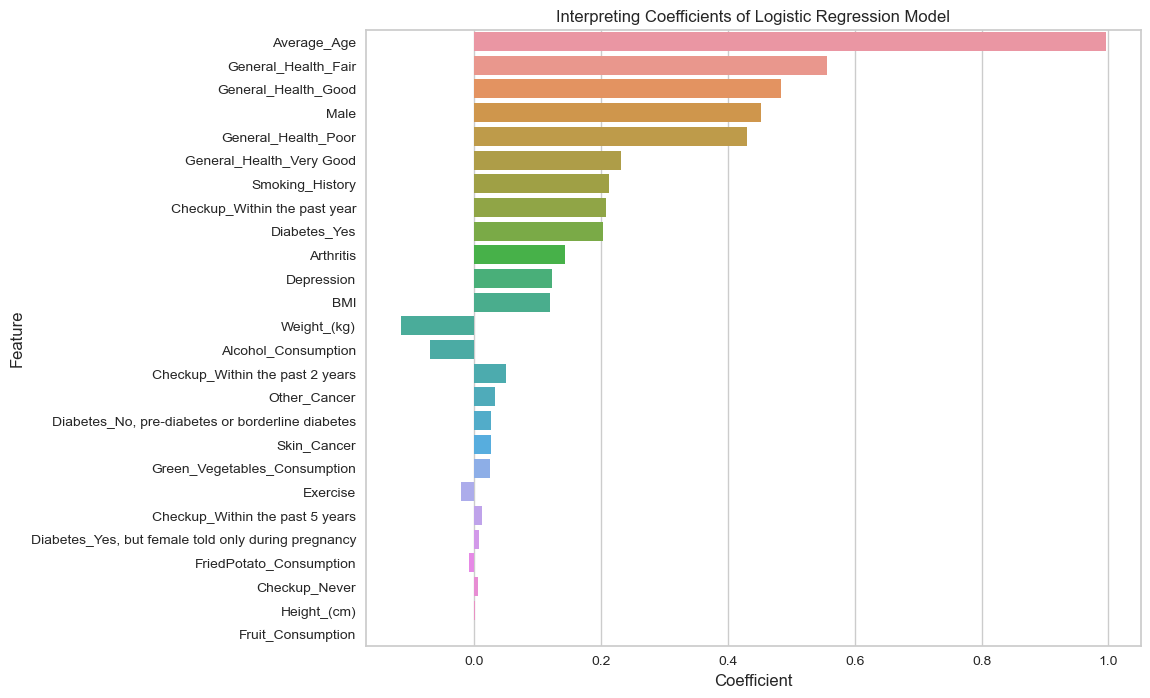

In [105]:
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients and their interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight the most important features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Print the interpretation of the coefficients
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Optionally, you can plot the coefficients to visualize their magnitudes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Interpreting Coefficients of Logistic Regression Model')
plt.show()